<a href="https://colab.research.google.com/github/jiw3026/analy/blob/main/%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
df = pd.read_csv('/content/preprocessing.csv')
df_축산업 = pd.read_csv('/content/data_045.csv', encoding='euc-kr')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

KeyError: ignored

In [ ]:
df['축산업'] = df_축산업['B25']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import StrMethodFormatter,FormatStrFormatter

In [ ]:
import numpy as np
df['숙박업'] = np.log1p(df['숙박업'])
df['여행업'] = np.log1p(df['여행업'])
df['세금'] = np.log1p(df['세금'])
df['잡화및쇼핑'] = np.log1p(df['잡화및쇼핑'])
df['농수산물'] = np.log1p(df['농수산물'])
df['결제대행'] = np.log1p(df['결제대행'])
df['요식업'] = np.log1p(df['요식업'])
df['가구/전자제품'] = np.log1p(df['가구/전자제품'])
df['중고품 판매점'] = np.log1p(df['중고품 판매점'])
df['사무/통신기기'] = np.log1p(df['사무/통신기기'])
df['통신요금'] = np.log1p(df['통신요금'])
df['의류'] = np.log1p(df['의류'])
df['귀금속/악세서리'] = np.log1p(df['귀금속/악세서리'])
df['취미/문화'] = np.log1p(df['취미/문화'])
df['학업'] = np.log1p(df['학업'])
df['보험'] = np.log1p(df['보험'])
df['장례업'] = np.log1p(df['장례업'])
df['법률업'] = np.log1p(df['법률업'])
df['오락'] = np.log1p(df['오락'])
df['의료'] = np.log1p(df['의료'])
df['제조업'] = np.log1p(df['제조업'])
df['자동차'] = np.log1p(df['자동차'])
df['축산업'] = np.log1p(df['축산업'])
df['자동차유지비'] = np.log1p(df['자동차유지비'])
df['연료/가스비'] = np.log1p(df['연료/가스비'])
df['수제용품점'] = np.log1p(df['수제용품점'])
df['기타'] = np.log1p(df['기타'])
df['자전거'] = np.log1p(df['자전거'])

In [ ]:
df2 = df.drop(columns=['P5','P6','B165','B166','E1','E2','E3','E4','E5','E6'])

In [ ]:
df2.drop(columns=['오락','법률업','장례업','귀금속/악세서리','예식업', '학업'], inplace=True)
df2

In [ ]:
df2['green_score'] = (df2['수제용품점']+df2['자전거'] +df2['중고품 판매점']) - (df2['자동차']+df2['연료/가스비']+df2['축산업'])

In [ ]:
df2['green_score'].describe()

count    473229.000000
mean         -3.056741
std           5.527056
min         -36.663481
25%          -8.987322
50%           0.000000
75%           0.000000
max          23.390522
Name: green_score, dtype: float64

In [ ]:
df2['green_score_cmp'] = df2['green_score']+abs(df2['green_score'].min())

In [ ]:
df2['green_score_cmp'].describe()

count    473229.000000
mean         33.606740
std           5.527056
min           0.000000
25%          27.676159
50%          36.663481
75%          36.663481
max          60.054003
Name: green_score_cmp, dtype: float64

In [ ]:
data_train_T=df2['green_score_cmp']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 20:
        target.append(1)
    elif data_train_T.iloc[i] < 30:
        target.append(2)
    elif data_train_T.iloc[i] < 45:
        target.append(3)
    else:
        target.append(4)
        
df2["Range"] = target

In [ ]:
df2.drop(columns = ['green_score'],inplace = True)

In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

from scipy.stats import chi2_contingency

In [ ]:
chiresult = chi2_contingency(df2,correction = False)
print('Chi square: {}'.format(chiresult[0]))
print('p-value: {}'.format(chiresult[1]))

Chi square: 2479914582.0989456
p-value: 0.0


귀무가설 : greenscore 와 축산업 사이에는 관련성이 없다 , 있다

In [ ]:
result = pd.crosstab(df2.축산업,df2.green_score_cmp)
result

green_score_cmp,0.000000,0.435462,0.469150,2.196054,2.240271,4.194846,7.493495,8.182875,8.479574,8.527478,...,55.615302,56.244308,56.683647,57.035877,57.099152,57.112387,57.426031,57.782260,57.866151,60.054003
축산업,,,,,,,,,,,,,,,,,,,,,
0.000000,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
6.908755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.601402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.006701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.294300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.648420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.669501,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14.692229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
chiresult = chi2_contingency(result,correction = False)


In [ ]:
chiresult[0]

247032849.55338573

In [ ]:
chiresult[1]

0.0

In [ ]:
!pip install patsy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
df2.columns

Index(['P1', 'P3', 'P4', 'C1', '숙박업', '여행업', '세금', '잡화및쇼핑', '농수산물', '결제대행',
       '요식업', '가구/전자제품', '중고품 판매점', '사무/통신기기', '통신요금', '의류', '취미/문화', '보험',
       '의료', '제조업', '자동차', '자동차유지비', '연료/가스비', '수제용품점', '기타', '전체금액', '자전거',
       'age', 'bank', '축산업', 'green_score_cmp', 'Range'],
      dtype='object')

In [ ]:
df2['중고'] = df2['중고품 판매점']

In [ ]:
features = "중고+age+bank+축산업+green_score_cmp+Range+농수산물+자동차+수제용품점+자전거"

In [ ]:
y,X = dmatrices("green_score_cmp~"+features,data=df2,return_type = "dataframe")

vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

result = sm.OLS(y,X).fit()

In [ ]:
print(result.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7ff8fd0bd490>>


In [ ]:
result.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7ff8fd0bd490>>

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473229 entries, 0 to 473228
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   P1               473229 non-null  int64  
 1   P3               473229 non-null  int64  
 2   P4               473229 non-null  int64  
 3   C1               473229 non-null  int64  
 4   숙박업              473229 non-null  float64
 5   여행업              473229 non-null  float64
 6   세금               473229 non-null  float64
 7   잡화및쇼핑            473229 non-null  float64
 8   농수산물             473229 non-null  float64
 9   결제대행             473229 non-null  float64
 10  요식업              473229 non-null  float64
 11  가구/전자제품          473229 non-null  float64
 12  중고품 판매점          473229 non-null  float64
 13  사무/통신기기          473229 non-null  float64
 14  통신요금             473229 non-null  float64
 15  의류               473229 non-null  float64
 16  취미/문화            473229 non-null  floa

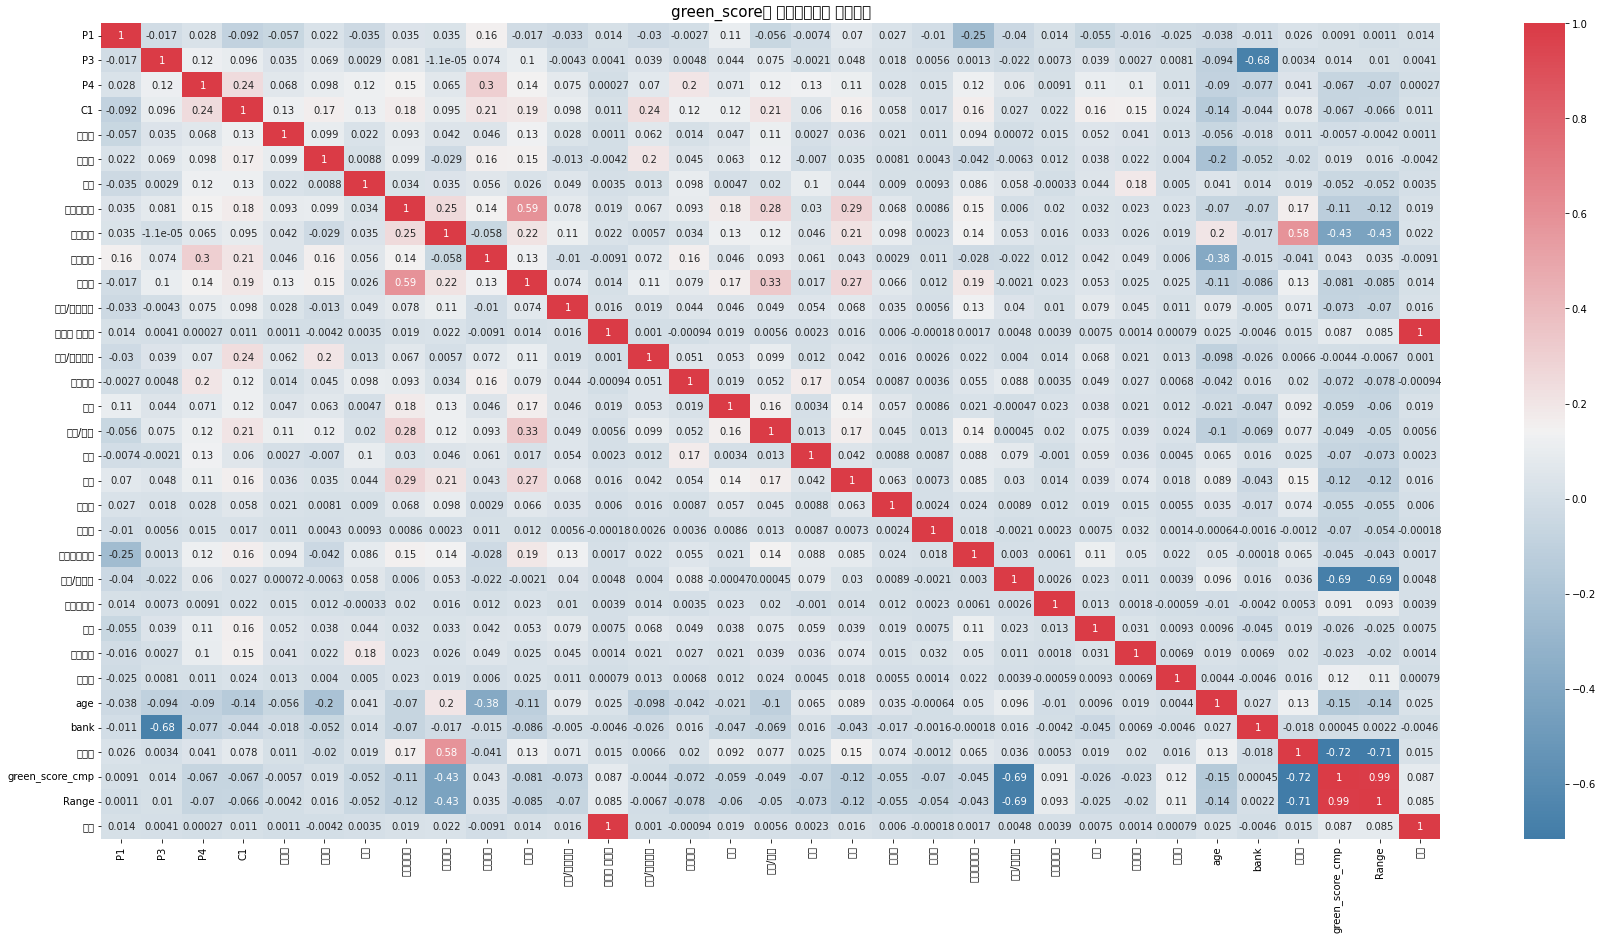

In [ ]:
f,ax = plt.subplots(figsize = (30,15))
plt.title('green_score와 환경변수들의 상관관계',fontsize = 15)
sns.heatmap(df2.corr('pearson').T,cmap = sns.diverging_palette(240,10,as_cmap = True),ax=ax,annot = True)
plt.show()

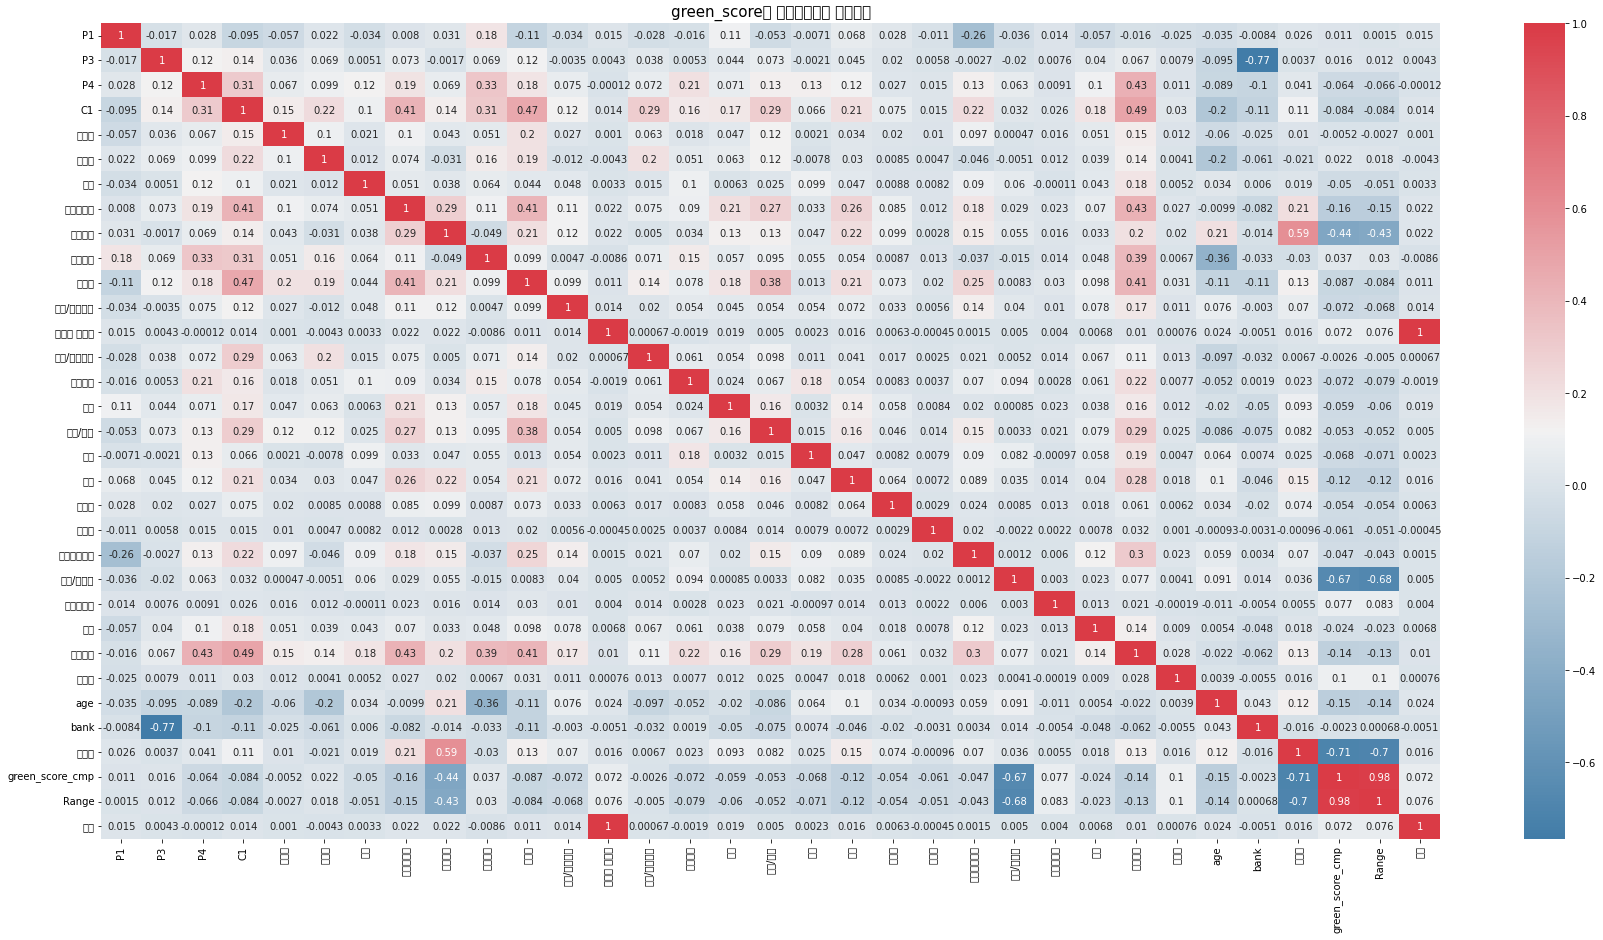

In [ ]:
f,ax = plt.subplots(figsize = (30,15))
plt.title('green_score와 환경변수들의 상관관계',fontsize = 15)
sns.heatmap(df2.corr('spearman').T,cmap = sns.diverging_palette(240,10,as_cmap = True),ax=ax,annot = True)
plt.show()

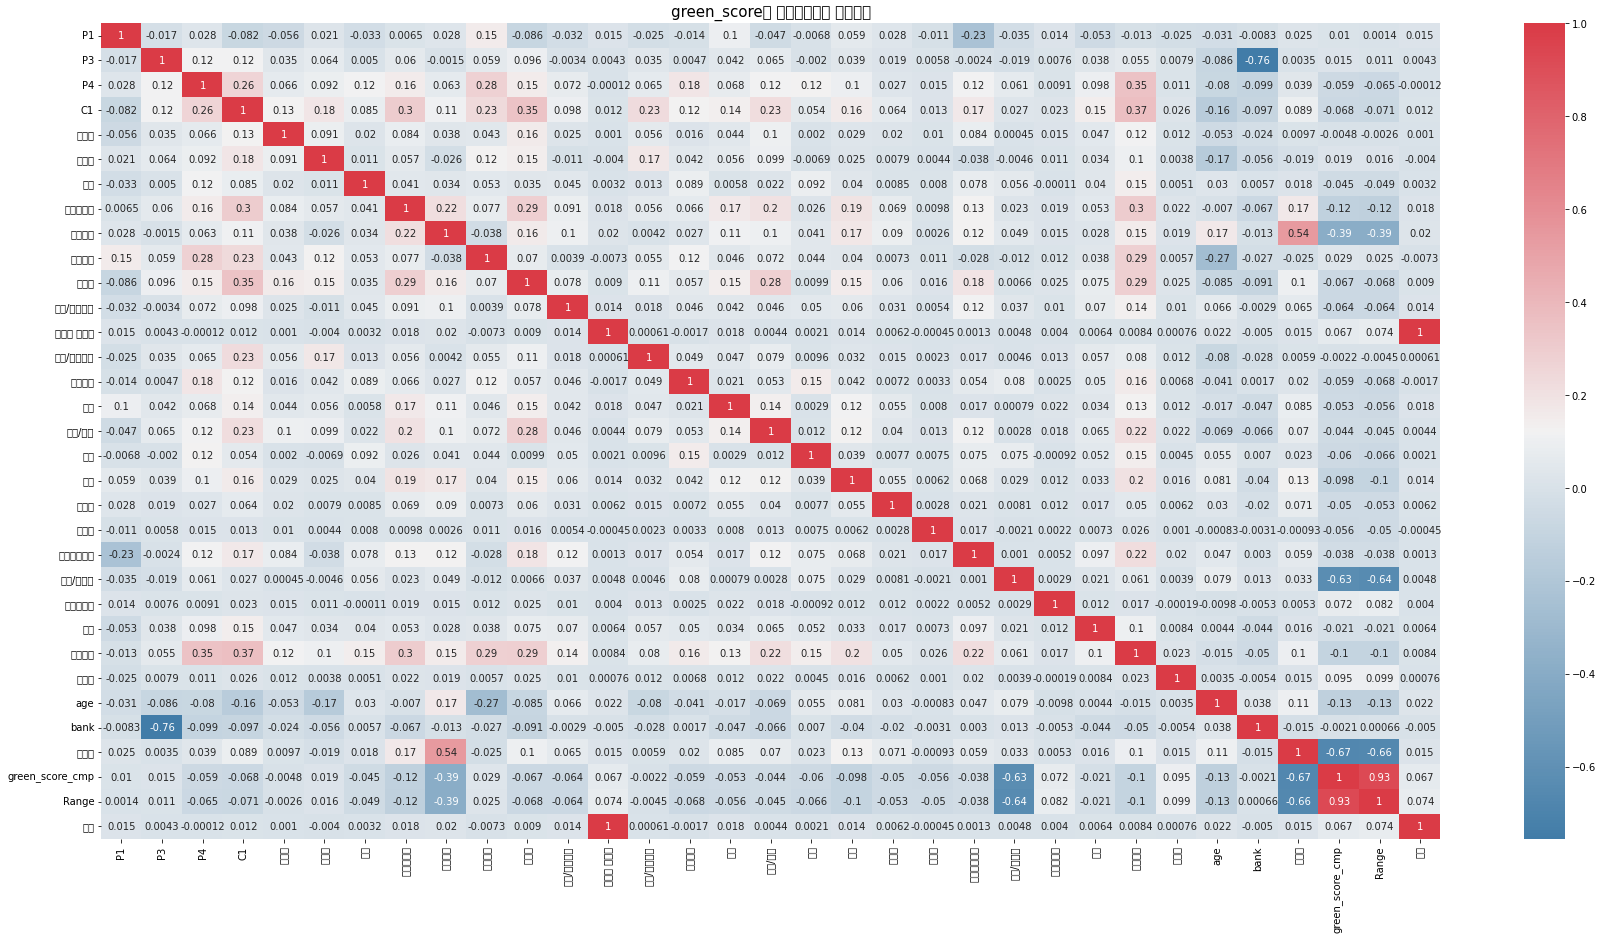

In [ ]:
f,ax = plt.subplots(figsize = (30,15))
plt.title('green_score와 환경변수들의 상관관계',fontsize = 15)
sns.heatmap(df2.corr('kendall').T,cmap = sns.diverging_palette(240,10,as_cmap = True),ax=ax,annot = True)
plt.show()

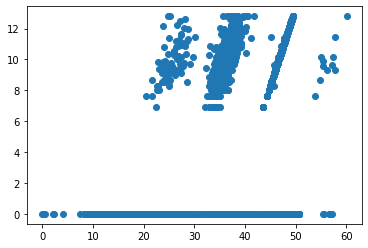

In [ ]:
x = df2['green_score_cmp']
y = df2['중고']

plt.plot(x,y,'o')
plt.show()

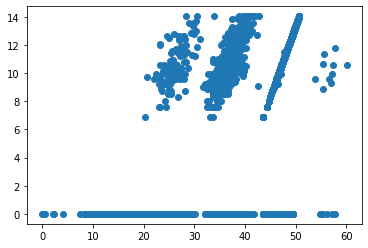

In [ ]:
x = df2['green_score_cmp']
y = df2['자전거']

plt.plot(x,y,'o')
plt.show()

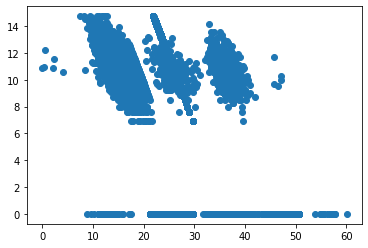

In [ ]:
x = df2['green_score_cmp']
y = df2['축산업']

plt.plot(x,y,'o')
plt.show()

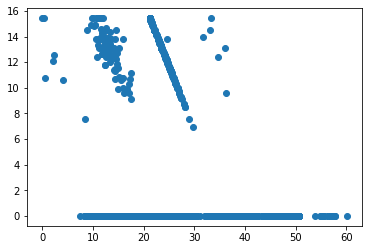

In [ ]:
x = df2['green_score_cmp']
y = df2['자동차']

plt.plot(x,y,'o')
plt.show()

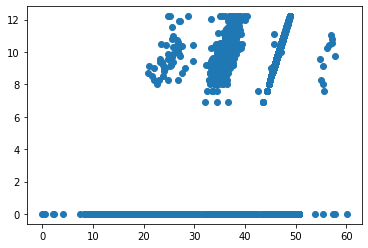

In [ ]:
x = df2['green_score_cmp']
y = df2['수제용품점']

plt.plot(x,y,'o')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X = df2[['수제용품점','중고','자전거','축산업','농수산물','연료/가스비']]

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y = df2['green_score_cmp']
lr.fit(X_poly,y)


LinearRegression()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
'''
./data/Advertising.csv 에서 데이터를 읽어, X와 Y를 만듬

X는 (200, 3) 의 shape을 가진 2차원 np.array,
Y는 (200,) 의 shape을 가진 1차원 np.array여야 함

X는 FB, TV, Newspaper column 에 해당하는 데이터를 저장
Y는 Sales column 에 해당하는 데이터를 저장
'''
X = df2[['수제용품점','중고','자전거','축산업','농수산물','연료/가스비','자동차유지비']]
X_poly = poly_features.fit_transform(X)
Y= df2['green_score_cmp']

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

beta_0 = lrmodel.coef_[0] # 0번째 변수에 대한 계수 (페이스북)
beta_1 = lrmodel.coef_[1] # 1번째 변수에 대한 계수 (TV)
beta_2 = lrmodel.coef_[2] # 2번째 변수에 대한 계수 (신문)
beta_3 = lrmodel.coef_[3] # 2번째 변수에 대한 계수 (신문)
beta_4 = lrmodel.coef_[4] # 2번째 변수에 대한 계수 (신문)
beta_5 = lrmodel.coef_[5] # 2번째 변수에 대한 계수 (신문)

beta_3 = lrmodel.intercept_ # y절편 (기본 판매량)

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)
print("beta_4: %f" % beta_4)
print("beta_5: %f" % beta_5)

predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("RMSE on test : {}".format(np.sqrt(mse_test)))
print("MSE on test data: {}".format(mse_test))


def expected_sales(fb, tv, newspaper, beta_0, beta_1, beta_2, beta_3):
    '''
    FB에 fb만큼, TV에 tv만큼, Newspaper에 newspaper 만큼의 광고비를 사용했고,
    트레이닝된 모델의 weight 들이 beta_0, beta_1, beta_2, beta_3 일 때
    예상되는 Sales 의 양을 출력
    '''
    
    sales = beta_0 * fb + beta_1 * tv + beta_2 * newspaper + beta_3

    return sales



beta_0: 1.030784
beta_1: 1.004489
beta_2: 1.016258
beta_3: 36.657211
beta_4: 0.000748
beta_5: -1.000284
MSE on train data: 0.15614341533233375
RMSE on test : 0.42829676652487125
MSE on test data: 0.18343812021566006
